# Project: Predicting Medical Insurance charges using Regression

This project focuses on predicting individual medical charges billed by health insurance, based on patient information like age, BMI, smoking habits, number of children, and region.
 - Exploratory Data Analysis
 - Feature Engineering
 - Model Training - Linear Regression and Random Forest Regressor to estimate charges.

Goal: To help insurance companies or healthcare providers estimate potential medical costs.

## 1. Import Libraries
We start by importing python libraries used for data handling, visualisation, and machine learning.

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## 2. Data Overview

We load the dataset and inspect structure, datatypes, and summary statistics.


In [278]:
data = pd.read_csv('medical_cost.csv')

# 3. Exploratory Data Analysis(EDA)
Let's explore the data : columns, missing values, and dtypes.

In [167]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [169]:
#Check data 
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [171]:
#Summary Statistics
data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [175]:
#Check missing values
data.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 4. Data Cleaning
Handling data types

In [178]:
data['sex'] = data['sex'].map({'female':1, 'male':0})
data['smoker'] = data['smoker'].apply(lambda x:1 if x=='yes' else 0)


# 5.  Feature Engineering

Transforming categorical columns into boolean format using encoding technique like one-hot-encoding, and prepare the data for modelling.

In [190]:
df = pd.get_dummies(data, columns=['region'], drop_first=True)

# 6. Checking for Outliers
Identifying outliers using zscore. Outliers can skew the model, especially in regression. So to avoid errors in training the model, we either transform them or handle them differently.


In [195]:

# Calculate z-scores
z_scores = zscore(df['charges'])

# Mark as outlier if z-score is greater than 3 or less than -3
outliers = df[(z_scores > 3) | (z_scores < -3)]
print("Number of outliers:", len(outliers))

Number of outliers: 7


In [197]:
print(outliers)

        Id  age  sex     bmi  children  smoker      charges  region_northwest  \
34      35   28    0  36.400         1       1  51194.55914             False   
543    544   54    1  47.410         0       1  63770.42801             False   
577    578   31    1  38.095         1       1  58571.07448             False   
819    820   33    1  35.530         0       1  55135.40209              True   
1146  1147   60    0  32.800         0       1  52590.82939             False   
1230  1231   52    0  34.485         3       1  60021.39897              True   
1300  1301   45    0  30.360         0       1  62592.87309             False   

      region_southeast  region_southwest  
34               False              True  
543               True             False  
577              False             False  
819              False             False  
1146             False              True  
1230             False             False  
1300              True             False  


# 7. Log Transformation of Charges
Medical charges are often right-skewed due to a small number of very high-cost cases (smokers). To reduce skewness and improve model performance, we apply a log transformation.
This makes the distribution more normal and improves model performance.

In [225]:
df['charges'] = np.log(df['charges'])

# 8. Boxplot

Using seaborn to plot boxplots and understand how smoking habits affect medical charges. 

<Axes: xlabel='smoker', ylabel='charges'>

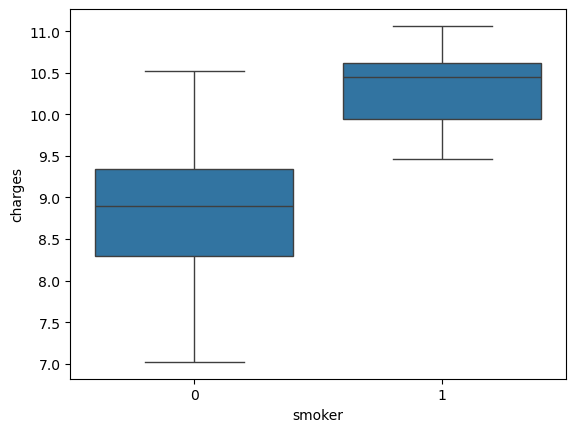

In [228]:

sns.boxplot(x='smoker', y='charges', data=df)


Smoking status showed a strong positive correlation with medical charges, indicating that smokers tend to incur higher healthcare costs.

# 9.Train-Test Split
We split the data into training and testing sets to evaluate the model's performance.

In [249]:
#Model setup

X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train_log, y_test_log = train_test_split(X, np.log(y), test_size= 0.2, random_state = 42)

# 10. Model Training - Linear Regression

We train a linear regression model to predict medical charges and evaluate its performance using R² score and mean absolute error.

In [263]:

#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

# Predict in log scale
y_pred_log_lr = lr_model.predict(X_test)

#Convert predictions and actuals back to original scale

y_pred_lr = np.exp(y_pred_log_lr)
y_test_actual = np.exp(y_test_log)

#Evaluate 
mae_lr = mean_absolute_error(y_test_actual, y_pred_lr)
r2_lr =r2_score(y_test_actual, y_pred_lr)

print('Linear Regression')
print('MEA:', round(mae_lr, 2))
print('R2 Score:', round(r2_lr, 2))

Linear Regression
MEA: 0.27
R2 Score: 0.79


# Visualizing Model Performance
This plot compares the predicted charges with the actual charges. A perfect model would place all points on the red dashed line.

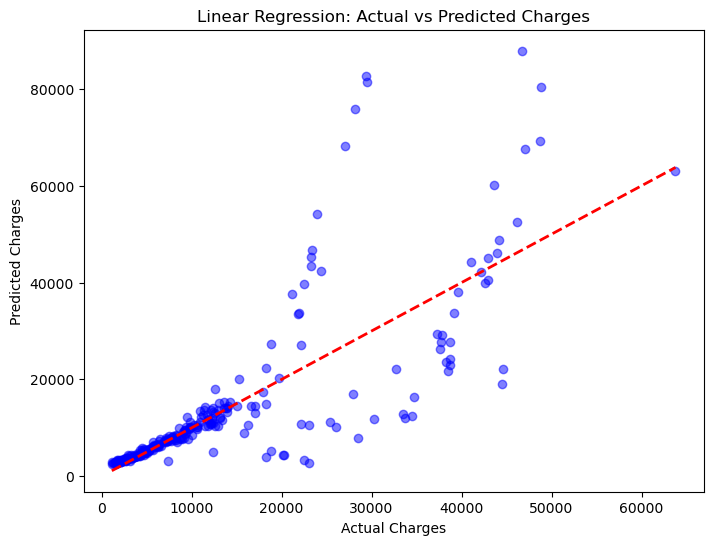

In [271]:


# Convert predictions and actual values back from log scale
y_pred_lin_original = np.exp(y_pred_lr)
y_test_original = np.exp(y_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_lin_original, alpha=0.5, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.show()

# 11. Model Training - Random Forest Regressor

Checking if a non-linear algorithm performs better than Linear Regression

In [265]:


# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_log)

# Predict in log scale
y_pred_log_rf = rf_model.predict(X_test)

# Convert predictions and actuals back to original scale
y_pred_rf = np.exp(y_pred_log_rf)

# Evaluate
mae_rf = mean_absolute_error(y_test_actual, y_pred_rf)
r2_rf = r2_score(y_test_actual, y_pred_rf)

print("\nRandom Forest")
print("MAE:", round(mae_rf, 2))
print("R2 Score:", round(r2_rf, 2))


Random Forest
MAE: 0.21
R2 Score: 0.84


While both models performed reasonably well, Random Forest outperformed Linear Regression with a lower mean absolute error and higher R² score, indicating better prediction accuracy.

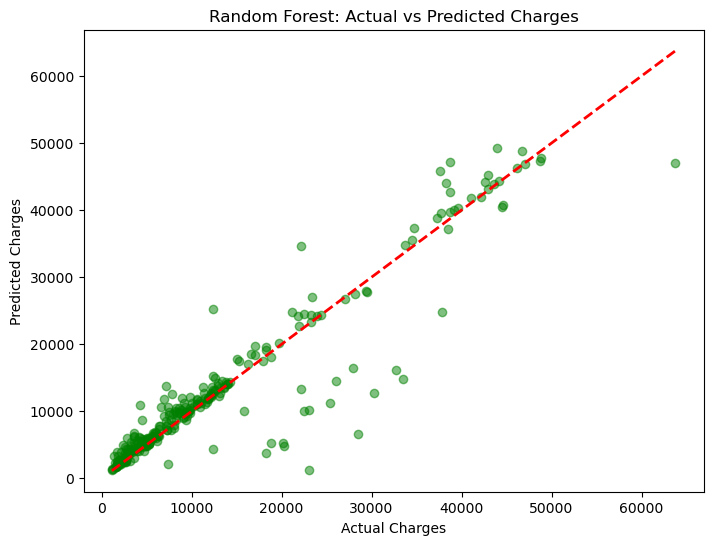

In [273]:
# Convert predictions and actual values back from log scale
y_pred_rf_original = np.exp(y_pred_rf)
# y_test_original is already defined above

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_rf_original, alpha=0.5, color='green')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.show()

## 12 Feature Importance
This plot shows which variables were most influencial in predicting medical charges. 

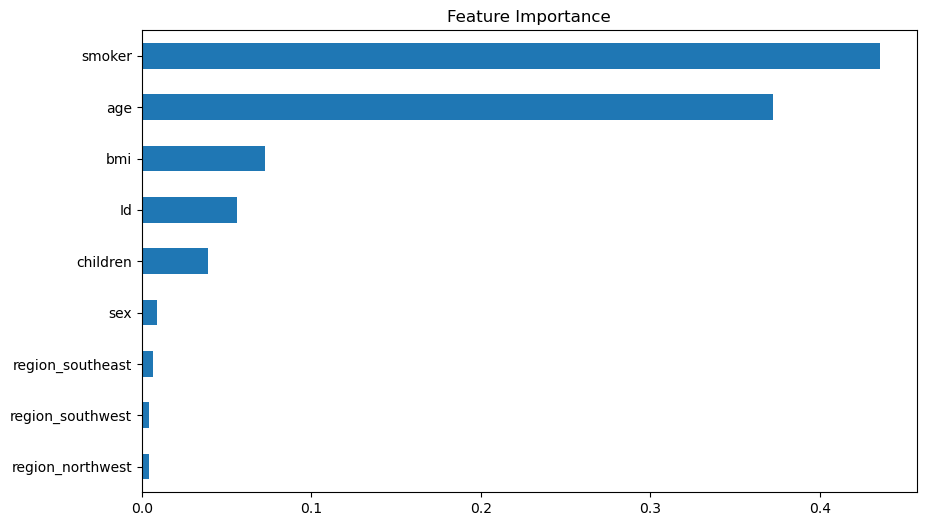

In [157]:

import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=True)

features.plot(kind='barh', figsize=(10,6), title='Feature Importance')
plt.show()

We can see that smoking status, age, BMI were the top factors affecting the prediction.

## Conclusion

- **Linear Regression**: R² = 0.79, MAE = 0.27
- **Random Forest**: R² = 0.84, MAE = 0.21

The Random Forest model outperforms linear regression. Smoking status and BMI-age interaction are strong predictors of medical charges.
